# Hotel Bookings Exploratory Data Analysis

# Objective

Our main objective is perform Exploratory Data Analysis (EDA) on the given dataset and draw useful conclusions about general trends in hotel bookings (on two hotels which are Resort Hotel and City Hotel) and how factors governing hotel bookings interact with each other.


# Dataset

We are given a hotel bookings dataset. This dataset contains booking information for a city hotel and a resort hotel. It contains the following features.

- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for 
                     Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.

The total number of rows in data: 119390 and the total number of columns: 32


I use this project to bench mark my data analysis skills in python, EDA ,pandas and plotly libraries and data visualization libraries This forms part of my data science bootcamp with HyperionDev.

My project includes:

1. jupyter notebook for my analysis code
2. Dataset used
3. report on my findings

Usage:

1. Download the code in a zip folder
2. unzip and save the notebook and dataset in one directory
3. run jupyter notebook ( if already installed)
4. use the report for summary of my findings after analysis

Remarks!

I hope you find the source code useful and be sure to leave a star if you have learned something or found it interesting. Thank You

# Context

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? 

This hotel booking dataset can help you explore those questions!

# Content

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. 

All personally identifying information has been removed from the data.

# Explore and analyze the data to discover important factors that govern the bookings.

In [10]:
# import libraries to be used

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from wordcloud import WordCloud, ImageColorGenerator
import warnings
import missingno as mn

# Supress warnings

warnings.filterwarnings('ignore')


In [2]:
# Reading the dataframe

hotel_df = pd.read_csv('hotel_bookings.csv')


# Taking a look to data

hotel_df.head()    

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
# Taking a look to data

hotel_df.tail()  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [4]:
# get dataframe dimensions
print("Database dimension     :",hotel_df.shape)
print("Database size          :",hotel_df.size)

# get info about the dataframe (columns,entries,datatype etc...)
hotel_df.info()     

# describe the dataframe and get statistics
hotel_df.describe()

Database dimension     : (119390, 32)
Database size          : 3820480
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

Get information on the dimension and structure of the dataset.

In [5]:
# Creating a copy of dataframe

hotel_df1 = hotel_df.copy()

First of all we will try to understand the meaning of all columns of the dataframe.
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [6]:
hotel_df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [115]:
hotel_df1['is_canceled'].unique()

array([0, 1], dtype=int64)

In [116]:
hotel_df1['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [117]:
hotel_df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [118]:
hotel_df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [119]:
hotel_df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [73]:
# This column has 0 as well as null values

hotel_df1['children'].unique()   

array([ 0.,  1.,  2., 10.,  3., nan])

# Data Cleaning and Feature Engineering

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:

1. Remove duplicate rows.
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns.
5. Check if there are any outliers and see how we treat the outliers (either drop them or impute them).

# Step 1: Removing duplicate rows if any

In [10]:
# See if there are any duplicates.
hotel_df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [19]:
# Show no. of rows of duplicate rows duplicate rows and get the shape of it.

hotel_df1[hotel_df1.duplicated()].shape

(0, 32)

In [21]:
# Dropping duplicate values

hotel_df1.drop_duplicates(inplace = True)

In [22]:
hotel_df1.shape

(87396, 32)

# Step2: Handling missing values.

In [23]:
# Columns having missing values.

hotel_df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

We see that there are 32 columns in the dataframe and some columns like 'company, 'agent', 'country' and 'children' have null values because the are missing values.

<Axes: >

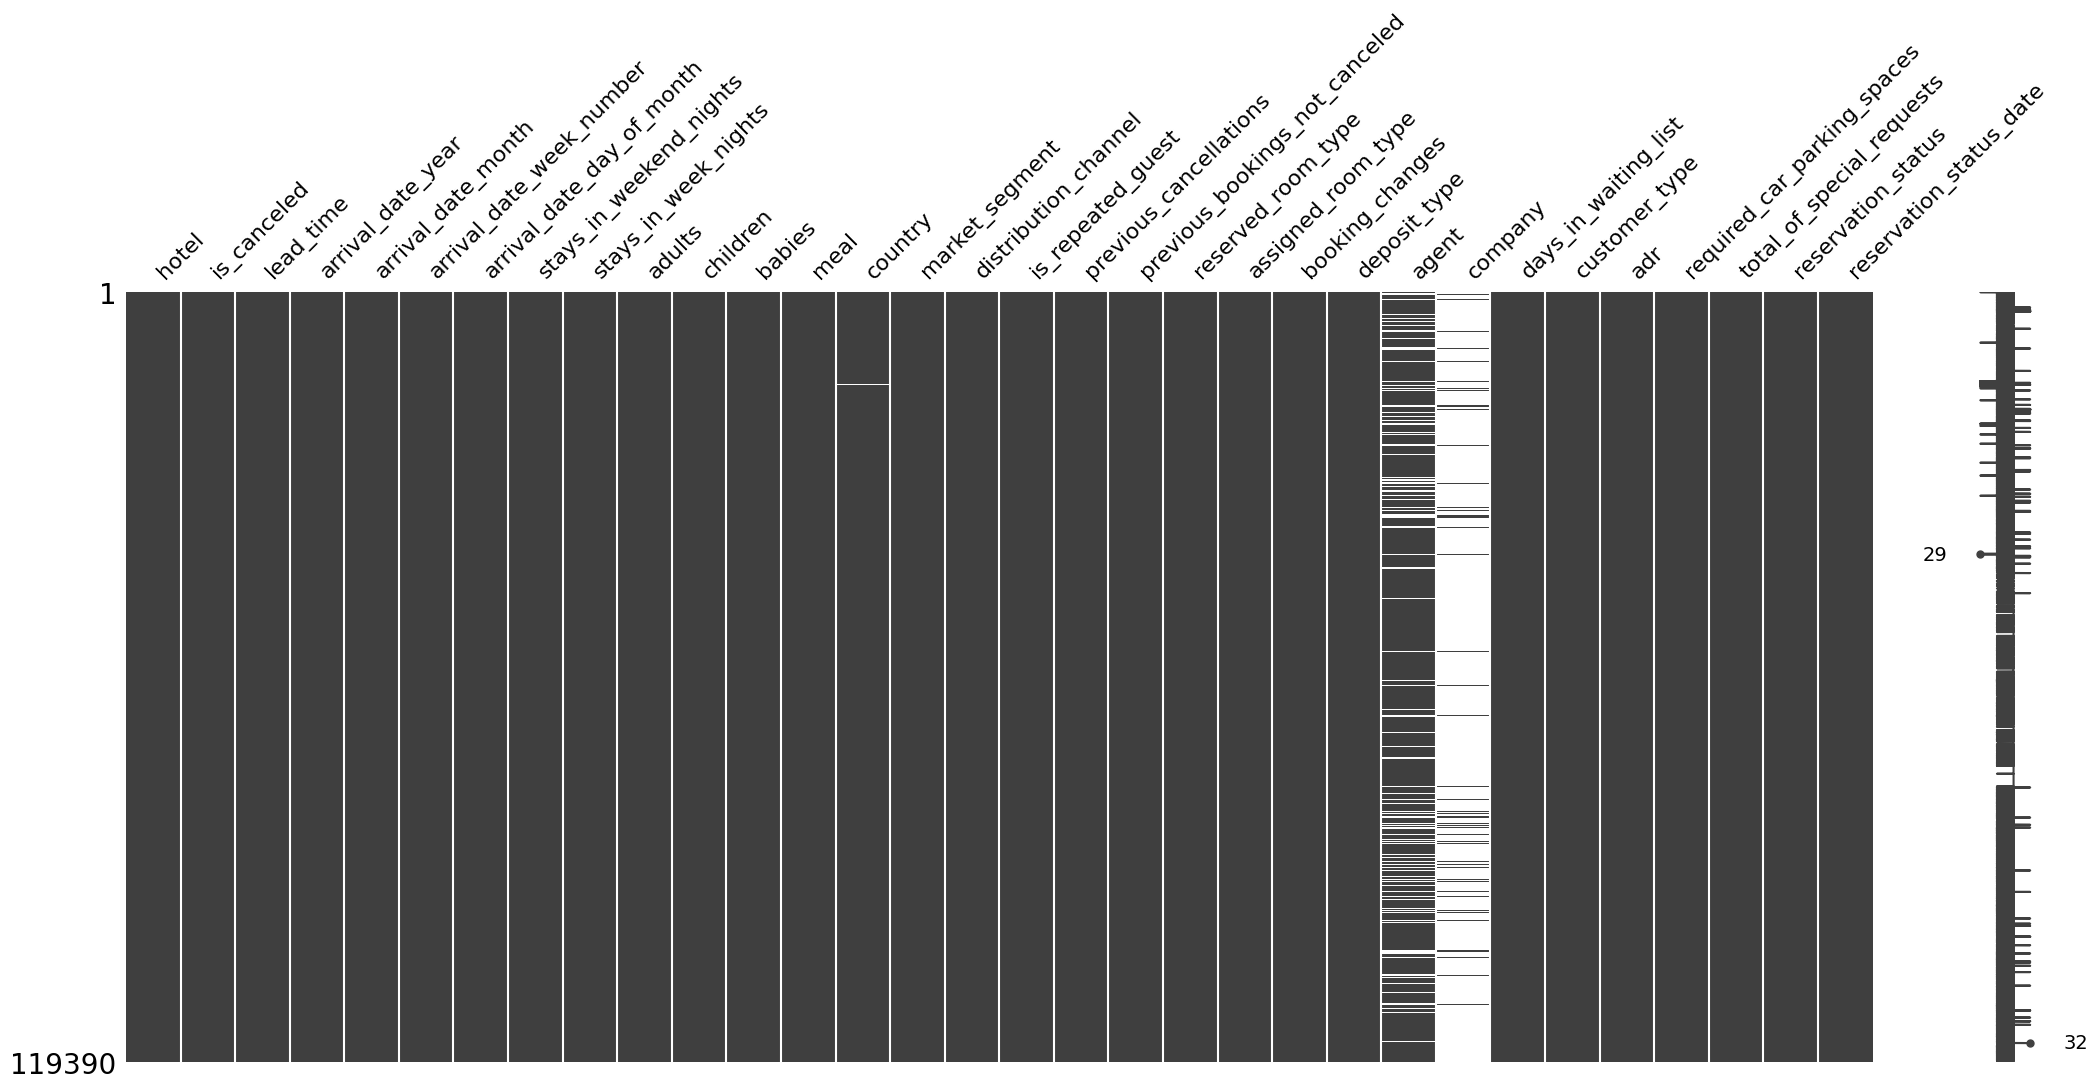

In [27]:
# Lets take a look at the dataframe to check null values

mn.matrix(hotel_df)

In [28]:
#Column-wise null percentage

print(round(100*(hotel_df1.isnull().sum()/len(hotel_df1.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.52
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.95
company                           93.98


Since, company and agent columns have company number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. We will replace null values by 0 in these columns.

In [29]:
hotel_df1[['company','agent']] = hotel_df1[['company','agent']].fillna(0)

In [30]:
hotel_df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.

So, 'nan' values are the missing values due to error of recording data.

We will replace the null values under this column with mean value of children.

In [31]:
hotel_df1['children'].fillna(hotel_df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer.
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [32]:
hotel_df1['country'].fillna('others', inplace = True)

In [33]:
# Checking if all null values are removed

hotel_df1.isnull().sum().sort_values(ascending = False)[:6]


hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [34]:
hotel_df1[hotel_df1['adults'] + hotel_df1['babies'] + hotel_df1['children'] == 0].shape

(166, 32)

In [35]:
hotel_df1.drop(hotel_df1[hotel_df1['adults'] + hotel_df1['babies'] + hotel_df1['children'] == 0].index, inplace = True)

# Step 3: Converting columns to appropriate datatypes.

In [120]:
# and we notice that the company column has 112593 missing values, agent has 16340 missing values, country has 488 missing values, total_people has 4 missing values children has 4 missing values. This poses a problem to our dataset and the missing values must be populated. I had to fill all these columns with missing values to solve the problem. 
hotel_df1[['children', 'company', 'agent']] = hotel_df1[['children', 'company', 'agent']].astype('int64')

In [121]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel_df1['reservation_status_date'] = pd.to_datetime(hotel_df1['reservation_status_date'], format = '%d/%m/%Y')

# Step 4: Adding important columns.

In [122]:
# Adding total staying days in hotels
hotel_df1['total_stay'] = hotel_df1['stays_in_weekend_nights'] + hotel_df1['stays_in_week_nights']

Created new column total_stay by adding stays_in_weekend_nights + stays_in_week_nights.

We are adding this column so that we can analyse the stay length at hotels.

In [123]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_df1['total_people'] = hotel_df1['adults'] + hotel_df1['children'] + hotel_df1['babies']

Created new column total_people by adding adults + children + babies.

In [41]:
hotel_df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


# Identify Continuous and Categorical Variables

In [42]:
def var(hotel_df1):
    unique_list = pd.DataFrame([[i,len(hotel_df1[i].unique())] for i in hotel_df1.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel_df1.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 

cat_var, con_var = var(hotel_df1)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 17 )
 {'lead_time', 'previous_bookings_not_canceled', 'adults', 'total_stay', 'total_people', 'booking_changes', 'reservation_status_date', 'agent', 'previous_cancellations', 'country', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr', 'company', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list'} 

Categorical Variables( 17 )
 {'hotel', 'babies', 'meal', 'assigned_room_type', 'deposit_type', 'is_canceled', 'is_repeated_guest', 'children', 'required_car_parking_spaces', 'distribution_channel', 'arrival_date_year', 'total_of_special_requests', 'reservation_status', 'arrival_date_month', 'customer_type', 'market_segment', 'reserved_room_type'}


# Step 5: Check if there are any outliers and see how we treat the outliers (either drop them or impute them).

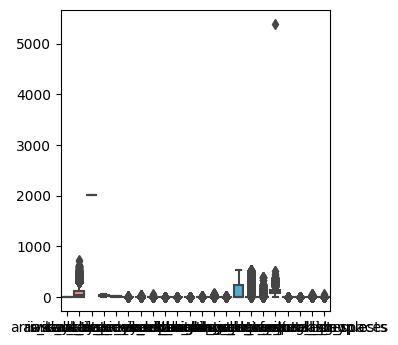

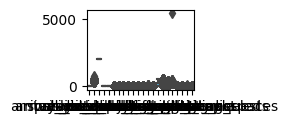

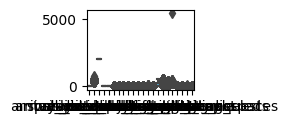

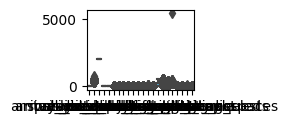

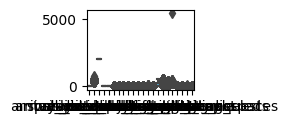

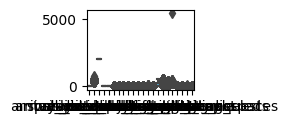

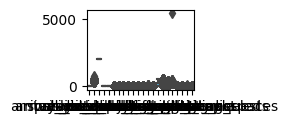

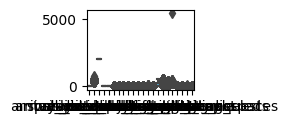

In [47]:
# Creating a boxplot for Outlier detection
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies','adr', 'booking_changes']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel_df1)
    n+=1
    plt.show()

The dataset contains Outliers.

In [46]:
#Checking outliers in continuous variables

hotel_df1[con_var].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_8556\1552647677.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hotel_df1[con_var].describe()


,lead_time,previous_bookings_not_canceled,adults,total_stay,total_people,booking_changes,agent,previous_cancellations,stays_in_weekend_nights,stays_in_week_nights,adr,company,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,79.971019,0.184054,1.879365,3.628534,2.029107,0.268497,81.089258,0.030402,1.004609,2.623925,106.518031,10.984948,26.835091,15.815832,0.746291
std,86.058683,1.733033,0.621724,2.742948,0.790141,0.710633,109.977255,0.369344,1.027408,2.039830,54.891227,53.956668,13.669216,8.835545,10.001001
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,1.000000,1.000000,0.000000
25%,11.000000,0.000000,2.000000,2.000000,2.000000,0.000000,9.000000,0.000000,0.000000,1.000000,72.250000,0.000000,16.000000,8.000000,0.000000
50%,49.000000,0.000000,2.000000,3.000000,2.000000,0.000000,9.000000,0.000000,1.000000,2.000000,98.200000,0.000000,27.000000,16.000000,0.000000
75%,125.000000,0.000000,2.000000,5.000000,2.000000,0.000000,240.000000,0.000000,2.000000,4.000000,134.100000,0.000000,37.000000,23.000000,0.000000
max,737.000000,72.000000,55.000000,69.000000,55.000000,18.000000,535.000000,26.000000,19.000000,50.000000,5400.000000,543.000000,53.000000,31.000000,391.000000


List of Continuous Variables with Outliers identified through Summary Statistics are:

1. lead_time
2. stays_in_weekend_nights
3. stays_in_week_nights
4. adults
5. previous_bookings_not_canceled
6. previous_cancellations
7. days_in_waiting_list
8. booking_changes

One outlier was found in the adr column. Simply dropped it.

List of Continuous Variables which should be Categorical are:
    
1. previous_bookings_not_canceled
2. previous_cancellations


Imputing the Outliers (for Continuous Variable)

In [48]:
# Imputing the Outliers (for Continuous Variable)
hotel_df1.loc[hotel_df1.lead_time                           >                    500,'lead_time']= 500
hotel_df1.loc[hotel_df1.days_in_waiting_list                >           0,'days_in_waiting_list']=  1
hotel_df1.loc[hotel_df1.stays_in_weekend_nights             >=       5,'stays_in_weekend_nights']=  5
hotel_df1.loc[hotel_df1.adults                              >                        4,'adults' ]=  4
hotel_df1.loc[hotel_df1.previous_bookings_not_canceled      > 0,'previous_bookings_not_canceled']=  1
hotel_df1.loc[hotel_df1.previous_cancellations              >         0,'previous_cancellations']=  1
hotel_df1.loc[hotel_df1.stays_in_week_nights                >       10,   'stays_in_week_nights']= 10
hotel_df1.loc[hotel_df1.booking_changes                     >                5,'booking_changes']=  5


In [49]:
cat_var = set(list(cat_var) + ['previous_bookings_not_canceled','previous_cancellations'])
con_var = set(hotel_df1.columns) - cat_var

In [50]:
hotel_df1[con_var].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_8556\1695964219.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hotel_df1[con_var].describe()


,lead_time,adults,total_stay,total_people,booking_changes,agent,stays_in_weekend_nights,stays_in_week_nights,adr,company,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,79.924189,1.875570,3.628534,2.029107,0.264049,81.089258,0.998922,2.600631,106.518031,10.984948,26.835091,15.815832,0.009802
std,85.804322,0.505248,2.742948,0.790141,0.661355,109.977255,0.993138,1.889452,54.891227,53.956668,13.669216,8.835545,0.098518
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,1.000000,1.000000,0.000000
25%,11.000000,2.000000,2.000000,2.000000,0.000000,9.000000,0.000000,1.000000,72.250000,0.000000,16.000000,8.000000,0.000000
50%,49.000000,2.000000,3.000000,2.000000,0.000000,9.000000,1.000000,2.000000,98.200000,0.000000,27.000000,16.000000,0.000000
75%,125.000000,2.000000,5.000000,2.000000,0.000000,240.000000,2.000000,4.000000,134.100000,0.000000,37.000000,23.000000,0.000000
max,500.000000,4.000000,69.000000,55.000000,5.000000,535.000000,5.000000,10.000000,5400.000000,543.000000,53.000000,31.000000,1.000000


In [51]:
#outliers in categorical variables

hotel_df1[cat_var].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_8556\2542798153.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hotel_df1[cat_var].describe()


,children,total_of_special_requests,is_canceled,previous_cancellations,babies,is_repeated_guest,required_car_parking_spaces,previous_bookings_not_canceled,arrival_date_year
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.138897,0.698934,0.275238,0.019271,0.010845,0.038565,0.084306,0.040559,2016.210352
std,0.456265,0.832051,0.446637,0.137476,0.113704,0.192556,0.281659,0.197268,0.686064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
max,10.000000,5.000000,1.000000,1.000000,10.000000,1.000000,8.000000,1.000000,2017.000000


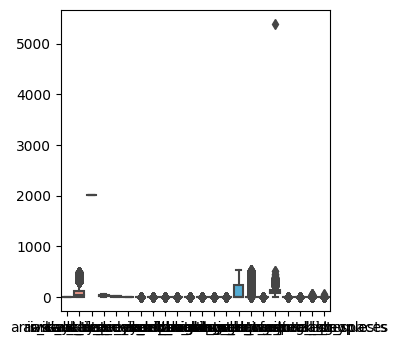

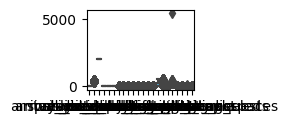

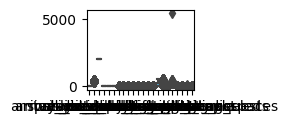

In [52]:
# Creating a boxplot for Outlier detection
features = ['babies', 'children','required_car_parking_spaces' ]
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel_df1)
    n+=1
    plt.show()

List of Categorical Variables with Outliers identified through Summary Statistics are:
1. babies
2. children
3. required_car_parking_spaces

# Imputing the Outliers (for Categorical Variables)

In [53]:
#Imputing the Outliers (for Categorical Variables)

hotel_df1.loc[hotel_df1.babies                        >                       8,'babies'] = 0
hotel_df1.loc[hotel_df1.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
hotel_df1.loc[hotel_df1.children                      >                     8,'children'] = 0

In [54]:
hotel_df1[cat_var].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_8556\2986363497.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hotel_df1[cat_var].describe()


,children,total_of_special_requests,is_canceled,previous_cancellations,babies,is_repeated_guest,required_car_parking_spaces,previous_bookings_not_canceled,arrival_date_year
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.138783,0.698934,0.275238,0.019271,0.010627,0.038565,0.084122,0.040559,2016.210352
std,0.455042,0.832051,0.446637,0.137476,0.104203,0.192556,0.279097,0.197268,0.686064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
max,3.000000,5.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2017.000000


Now we have treated the outliers.

# Exploratory Data Analysis

It is important to perform an EDA in the running of business so that you will have a clear idea of how the business is running.It is important for hotel owners to do an EDA since its main purpose is to help look at data before making any assumptions. In performing an EDA on the two Hotels I will try to answer the following questions:

Univariate Analysis

While doing univariate analysis of given hotel booking dataset, we answered following questions:
1. Which agent made most of bookings?
2. Which room type is in most demand and which room type generates highest adr?
3. From which country most of the customers are coming?
4. What is the most preferred meal by customers?
5. How long do people stay at the hotels?


Hotel wise Analysis

While doing hotel wise analysis of given hotel booking dataset, we answered following questions:
1. What is the percentage of bookings in each hotels?
2. Which hotel makes more revenue?
3. Which hotel has higher lead-time?
4. What is most preferred stay length in each hotel?
5. For which hotel, does people have to wait longer to get a booking confirmed?
6. Which hotel has higher booking cancellations rate?
7. Which hotel have higher and how much customer-returning rate?
8. How long do people stay at a hotel?


Distribution channel wise Analysis

While doing Distribution channel wise analysis of given hotel booking dataset, we answered following questions:
1. Which is the most common channel for booking hotels?
2. Which channel is mostly used for early booking of hotels?
3. Which channel has longer average waiting time?
4. Which distribution channel brings better revenue generating deals for hotels?


Booking cancellation Analysis

We analyze the following possible reasons for booking cancellations:
1. Which significant distribution channel has highest cancellation percentage?
2. Does a longer waiting period or longer lead-time causes the cancellation of bookings?
3. Whether not getting allotted the same room type as demand is the main cause of cancellation for bookings?
4. Does not alloting the same room as demanded affect adr?
5. Which deposit_type have a majotity of bookings?


Time wise Analysis

While doing time wise analysis of given hotel booking dataset, we answered following questions:
1. What are the busiest months for hotels?
2. In which months hotels charges higher adr? / Which month results in high revenue?
3. What is the trend of bookings within a month? / How does booking numbers and adr changes within a month?
4. Which types of customers mostly make bookings?

Some important questions

Some other analysis are also done, which are as follows:
    
1. How adr is affected by total staying period in hotels?
2. What is the optimal stay length for better deal for customers?
3. What are the different reason for special requests?

In [55]:
hotel_df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we won't need to check them for correlation.

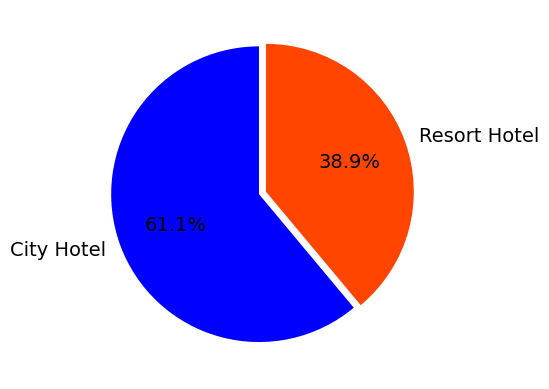

In [56]:
labels = hotel_df1['hotel'].value_counts().index.tolist()
sizes = hotel_df1['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['blue','orangered']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

In [57]:
hotel_df1['adults'].groupby(hotel_df1['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53274.0,1.881762,0.535634,0.0,2.0,2.0,2.0,4.0
Resort Hotel,33956.0,1.865856,0.453328,1.0,2.0,2.0,2.0,4.0


In [58]:
hotel_df1['children'].groupby(hotel_df1['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53274.0,0.132222,0.442743,0.0,0.0,0.0,0.0,3.0
Resort Hotel,33956.0,0.149075,0.473518,0.0,0.0,0.0,0.0,3.0


We can see by the above pie chart, that mojority of the people preferred city hotel over resort hotel. Further we can clearly see the mean value of adults and children are higher in case of resort hotel, hence they are a better choice for larger families.

Lets see does length of stay affects the adr.

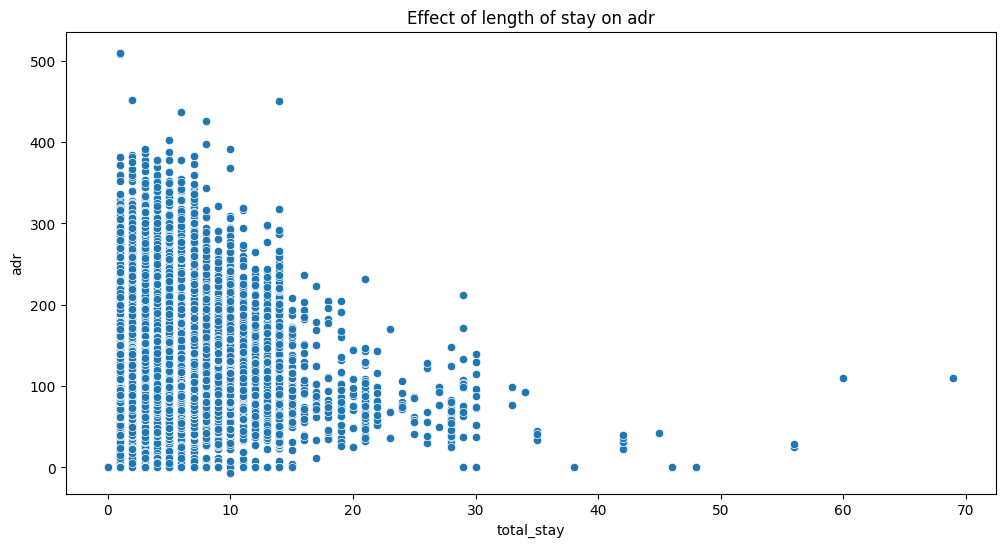

In [85]:
# Plotting the boxplot after removing the outlier in adr from dataframe.
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df1)
plt.title('Effect of length of stay on adr')
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot.

In [60]:
# Drop the adr since it has an outlier.
hotel_df1.drop(hotel_df1[hotel_df1['adr'] > 5000].index, inplace = True)

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

# Univariate Analysis

1. Which agent makes most number of bookings?

In [61]:
hotel_df1.rename(columns = {'index':'num_of_bookings','num_of_bookings':'agent'}, inplace = True)

In [62]:
hotel_df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


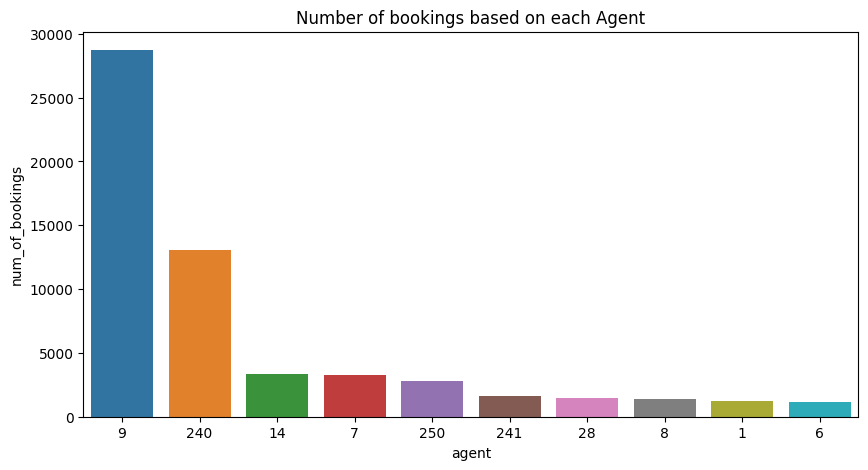

In [86]:
hotel_d1 = pd.DataFrame(hotel_df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
hotel_d1.drop(hotel_d1[hotel_d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
hotel_d1 = hotel_d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = hotel_d1, order = hotel_d1.sort_values('num_of_bookings', ascending = False).agent)
plt.title('Number of bookings based on each Agent')
plt.show()


Agent no. 9 has made most no. of bookings.

2. Which room type is in most demand and which room type generates highest adr?

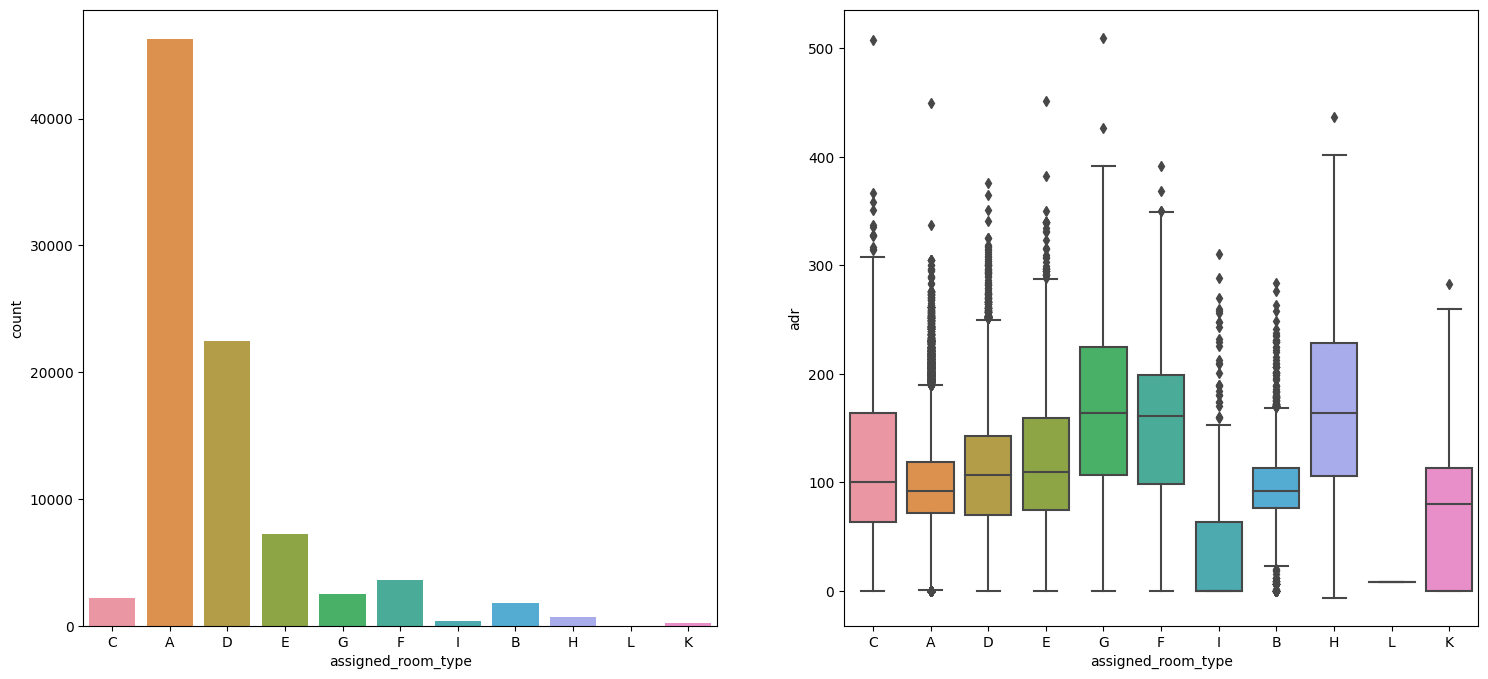

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hotel_df1.groupby('assigned_room_type')
hotel_d1['num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hotel_df1['assigned_room_type'])

sns.boxplot(ax = axes[1], x = hotel_df1['assigned_room_type'], y = hotel_df1['adr'])

plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

3. From where the most guests are coming?

In [93]:
country_wise_guests = hotel_df1[hotel_df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


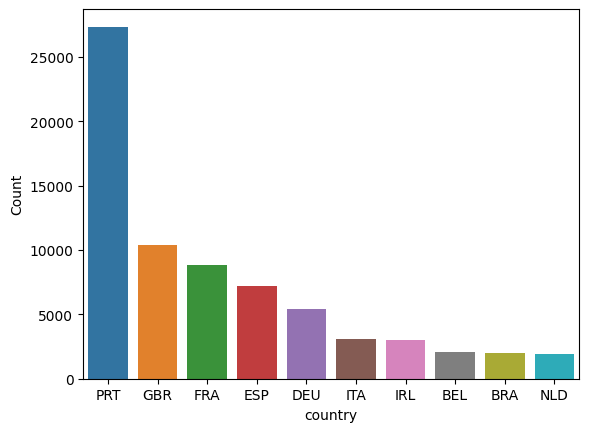

In [95]:
grouped_by_country = hotel_df1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Most guests/visitors are from western europe, namely Portugal, Great Britain, France and Spain being the highest.

4. Which meal type is most preffered meal of customers?

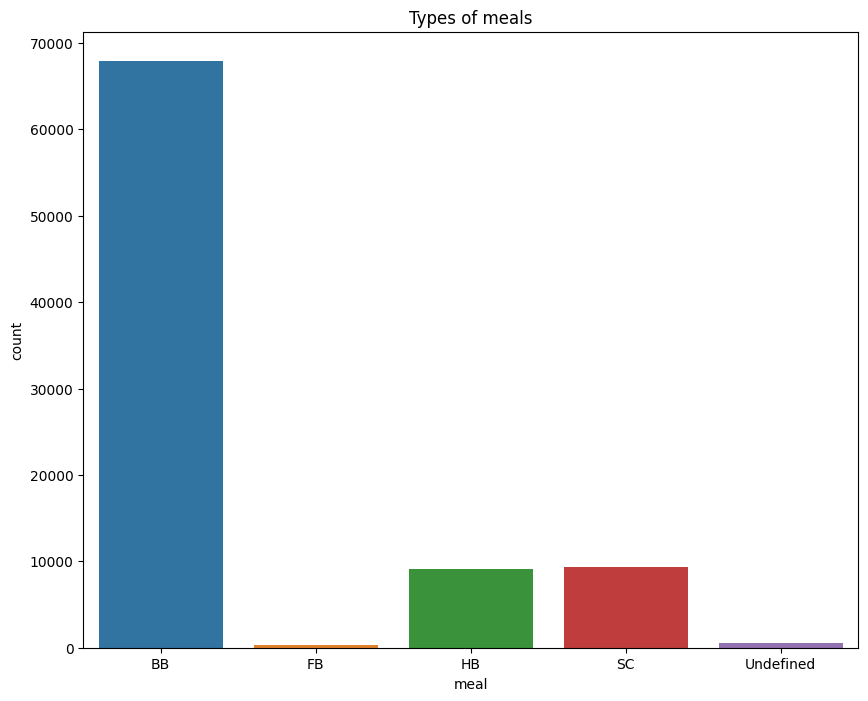

In [65]:
plt.figure( figsize=(10, 8))

sns.countplot(x = hotel_df1['meal'])
plt.title('Types of meals')
plt.show()

Most preferred meal type is BB (Bed and breakfast).

5. How long do people stay at the hotels?

In [146]:
filter = hotel_df1['is_canceled'] == 0
data = hotel_df1[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,same_room_not_alloted
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,0


In [147]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8556\2817623328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,same_room_not_alloted,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,0,2


In [148]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
5,2,Resort Hotel,3901
6,3,City Hotel,9300
7,3,Resort Hotel,3183
8,4,City Hotel,6523
9,4,Resort Hotel,2902


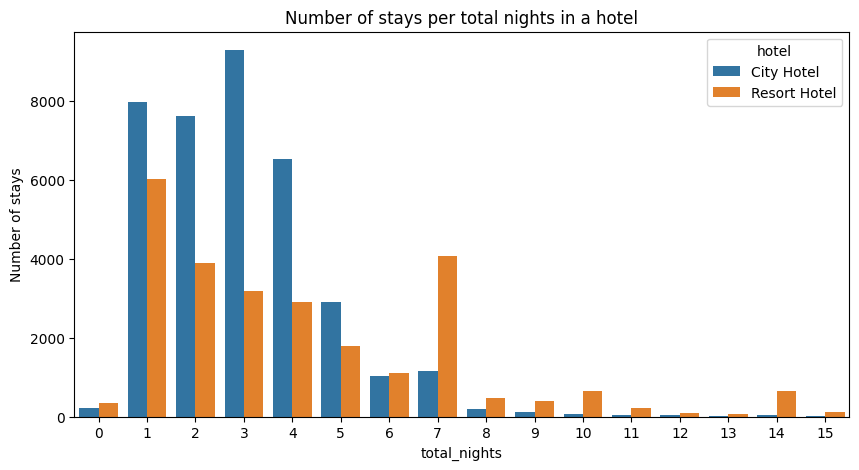

In [149]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')
plt.title('Number of stays per total nights in a hotel')
plt.show()

Most people prefer to stay at the hotels for <=5 days.

# (1) Hotel wise analysis

1. What is percentage of bookings in each hotel?

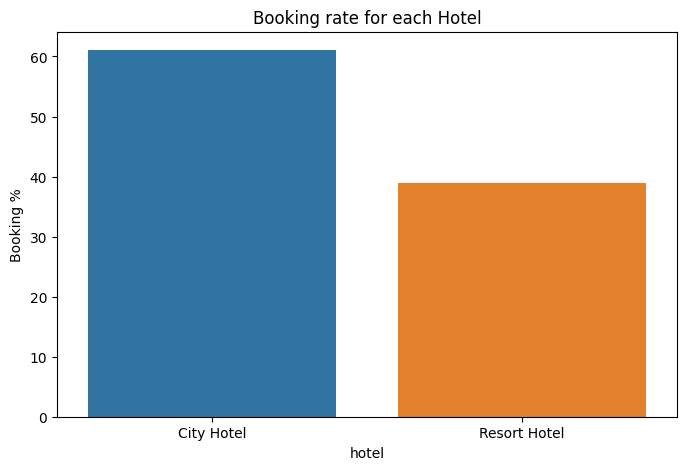

In [96]:
# Percentage of booking for each hotel.
grouped_by_hotel = hotel_df1.groupby('hotel')
hotel_d1 = pd.DataFrame((grouped_by_hotel.size()/hotel_df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = hotel_d1['hotel'], y = hotel_d1['Booking %'])
plt.title('Booking rate for each Hotel')
plt.show()

Approximately 62% bookings are for City hotel and 38% bookings are for Resort hotel.

2. Which hotel seems to make more revenue?

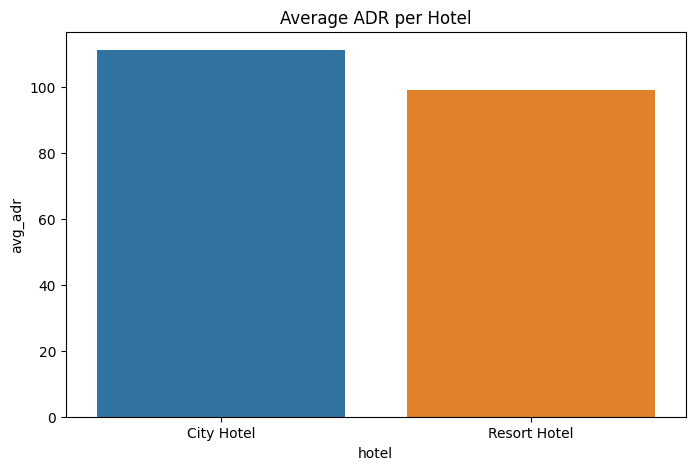

In [97]:
# The average adr for each hotel.

hotel_d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = hotel_d3['hotel'], y = hotel_d3['avg_adr'])
plt.title('Average ADR per Hotel')
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

3. Which hotel has higher lead time?

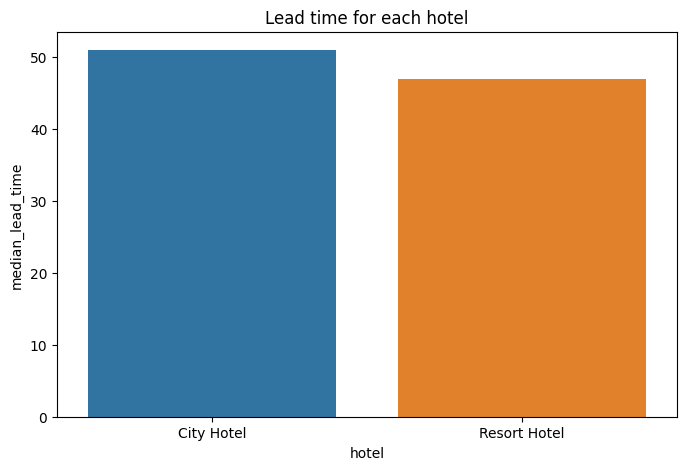

In [98]:
# Lead_time for each hotel
hotel_d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = hotel_d2['hotel'], y = hotel_d2['median_lead_time'])
plt.title('Lead time for each hotel')
plt.show()

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

4. What is preferred stay length in each hotel?

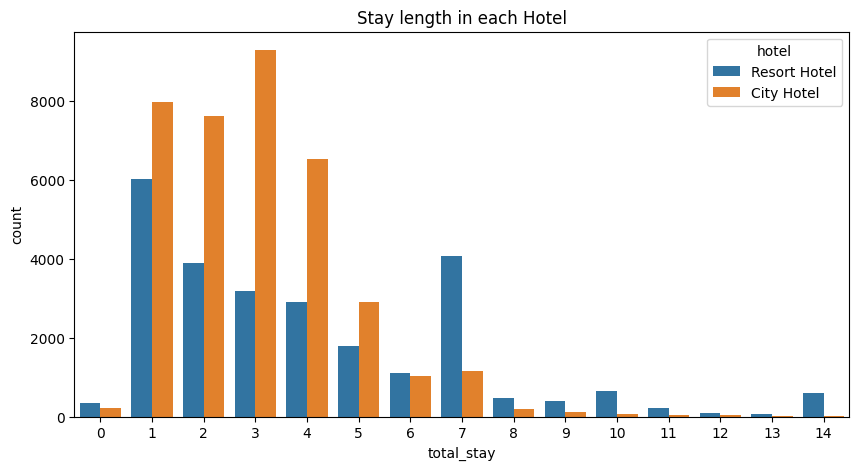

In [99]:
not_canceled = hotel_df1[hotel_df1['is_canceled'] == 0]
hotel_s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = hotel_s1['total_stay'], hue = hotel_s1['hotel'])
plt.title('Stay length in each Hotel')
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

5. Which hotel has longer waiting time?

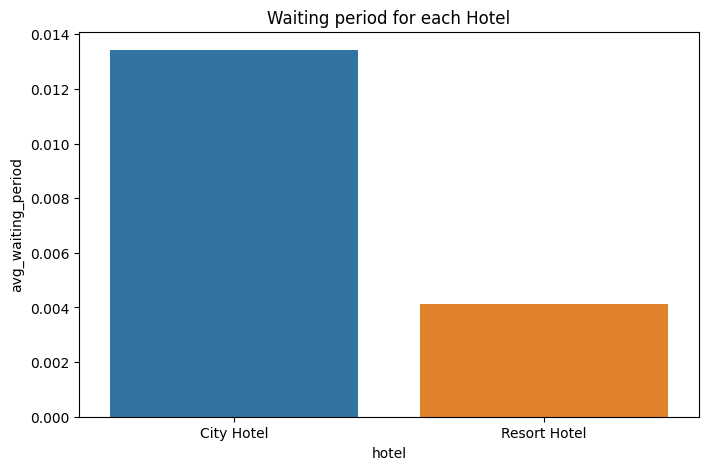

In [100]:
hotel_d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = hotel_d5['hotel'], y = hotel_d5['avg_waiting_period'])
plt.title('Waiting period for each Hotel')
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

6. Which hotel has higher bookings cancellation rate?

In [101]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hotel_df1[hotel_df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

#Counting total number of bookings for each type of hotel
grouped_by_hotel = hotel_df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3


,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


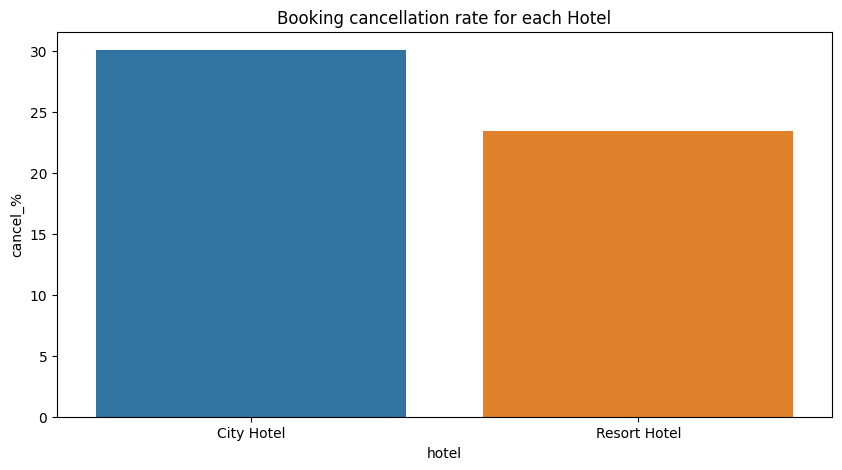

In [102]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.title('Booking cancellation rate for each Hotel')
plt.show()

Almost 30% of City Hotel and 28% for Resort Hotel bookings got cancelled.

7. Which hotel has high chance that its customer will return for another stay?

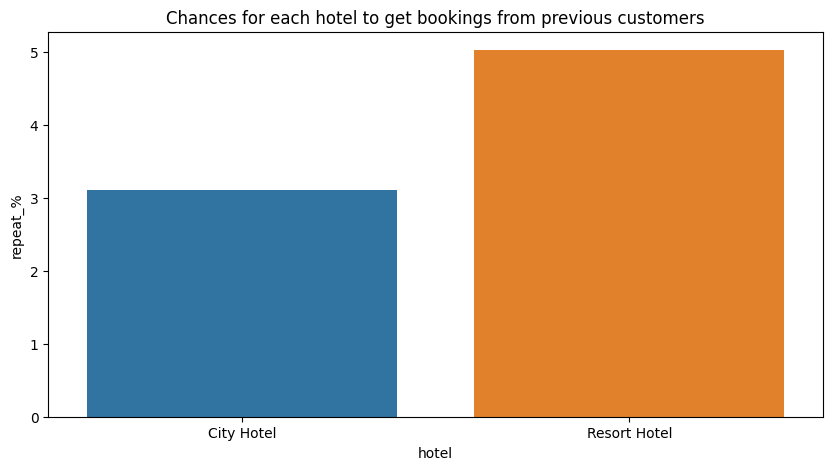

In [103]:
# Selecting and counting repeated customers bookings
repeated_data = hotel_df1[hotel_df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.title('Chances for each hotel to get bookings from previous customers')
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

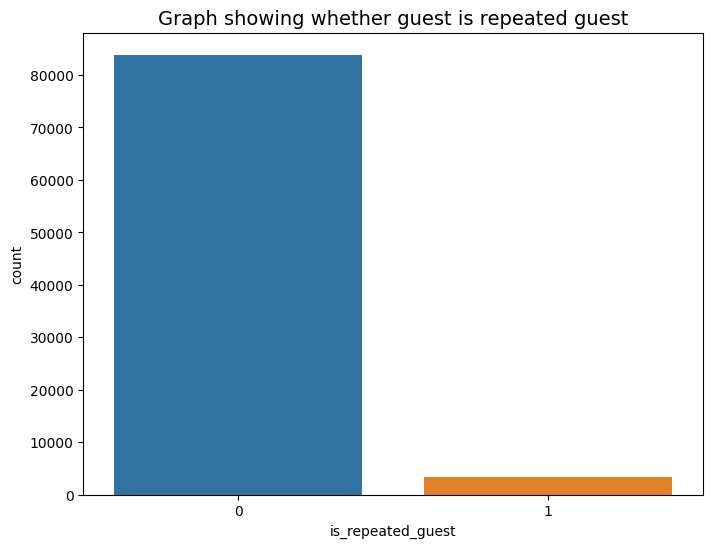

In [104]:
# Number of customers repeated their bookings.
plt.figure(figsize=(8,6))
sns.countplot(data = hotel_df1, x = 'is_repeated_guest')
plt.title('Graph showing whether guest is repeated guest', fontsize = 14)
plt.show()


Most customers are not repeating their booking.

# (2) Distribution Channel wise Analysis

1. Which is the most common channel for booking hotels?

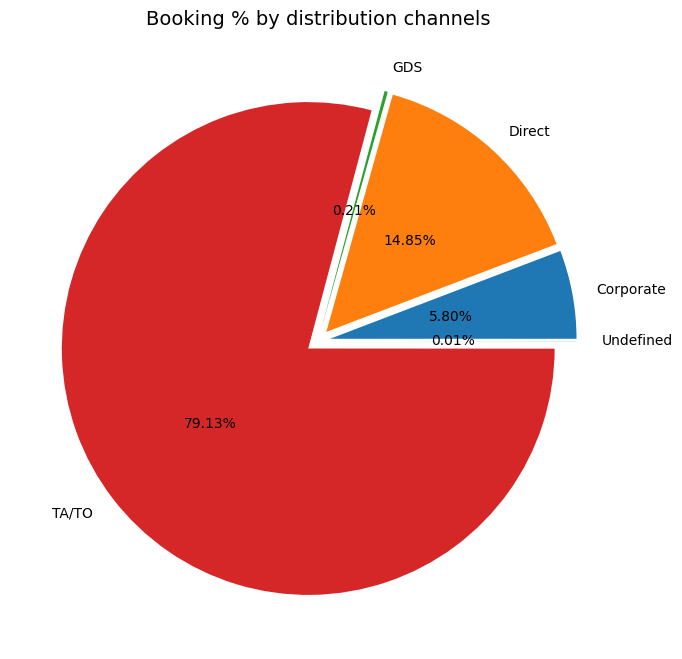

In [105]:
group_by_dc = hotel_df1.groupby('distribution_channel')
hotel_d1 = pd.DataFrame(round((group_by_dc.size()/hotel_df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = hotel_d1['Booking_%']
labels = hotel_d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

TA/TO is the most common channel used for hotel bookings.

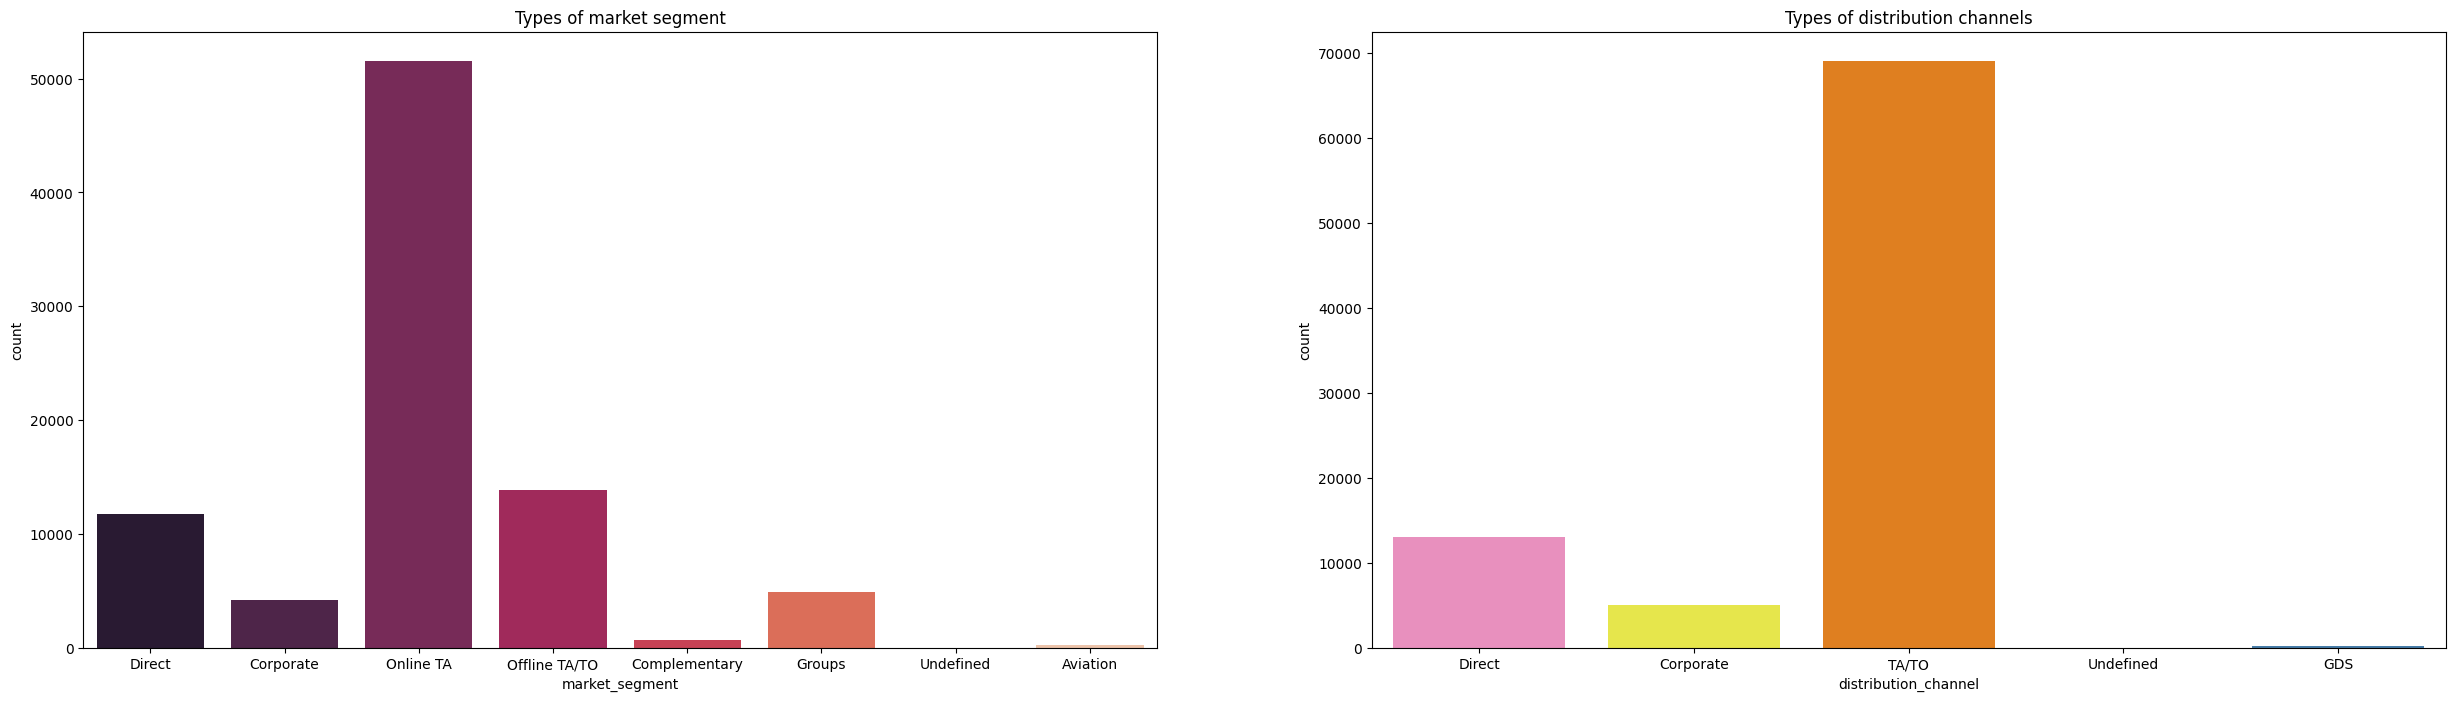

In [106]:
# Check if majority of  the bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=hotel_df1, palette='rocket')
plt.title('Types of market segment')

plt.subplot(1, 2, 2)
sns.countplot(data = hotel_df1, x = 'distribution_channel',  palette='Set1_r')
plt.title('Types of distribution channels')
plt.subplots_adjust(right=1.7)


plt.show()

Majority of the bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates.

2. Which channel is mostly used for early booking of hotels?

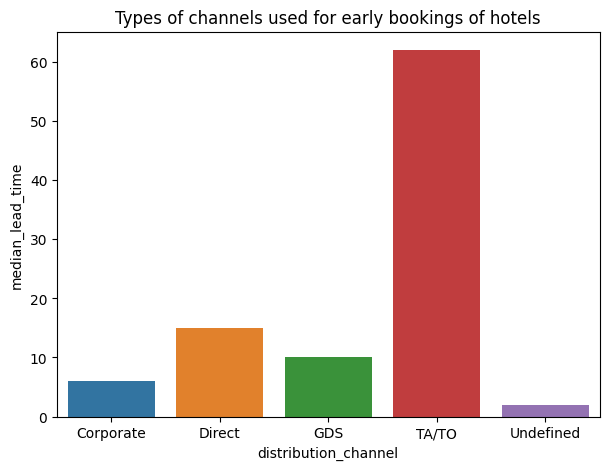

In [107]:
group_by_dc = hotel_df1.groupby('distribution_channel')
hotel_d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = hotel_d2['distribution_channel'], y = hotel_d2['median_lead_time'])
plt.title('Types of channels used for early bookings of hotels')
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

3. Which channel has longer average waiting time?

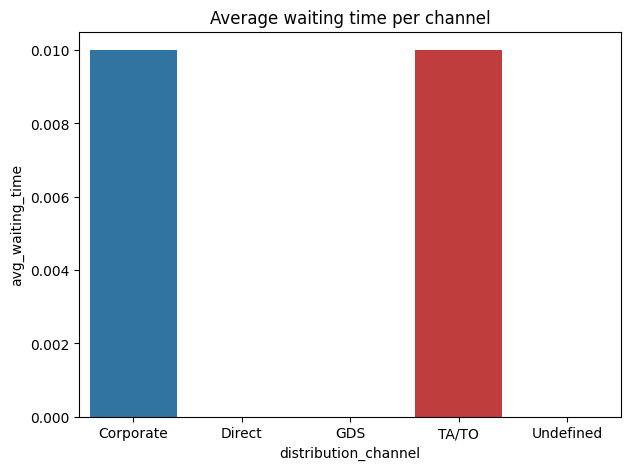

In [124]:
hotel_d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = hotel_d4['distribution_channel'], y = hotel_d4['avg_waiting_time'])
plt.title('Average waiting time per channel')
plt.show()

While booking via TA/TO and Corporate ones may have to wait a little longer to confirm booking of rooms.

4. Which distribution channel brings better revenue generating deals for hotels?

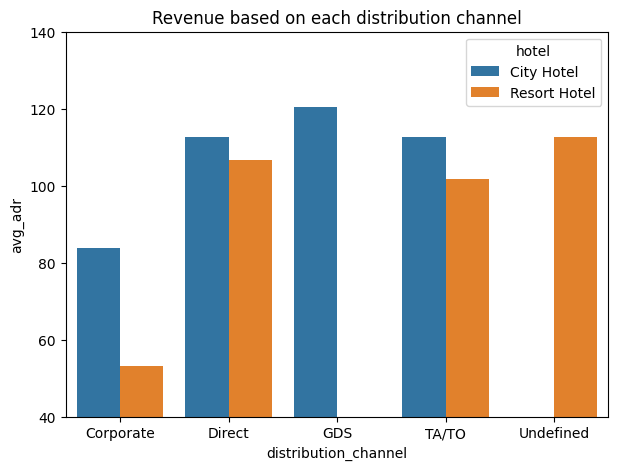

In [125]:
group_by_dc_hotel = hotel_df1.groupby(['distribution_channel', 'hotel'])
hotel_d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = hotel_d5['distribution_channel'], y = hotel_d5['avg_adr'], hue = hotel_d5['hotel'])
plt.ylim(40,140)
plt.title('Revenue based on each distribution channel')
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on Undefined channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

# (3) Booking cancellation Analysis

Let us try to understand what causes the people to cancel the booking.

1. Which significant distribution channel has highest cancellation percentage?

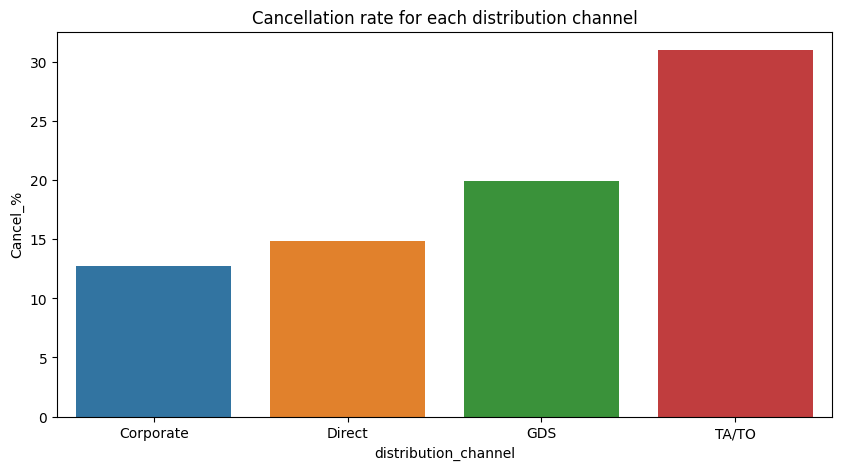

In [113]:
hotel_d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = hotel_d1.index, y = hotel_d1['Cancel_%'])
plt.title('Cancellation rate for each distribution channel')
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers.

2. Does a longer waiting period or longer lead time causes the cancellation of bookings?

Let us check that:

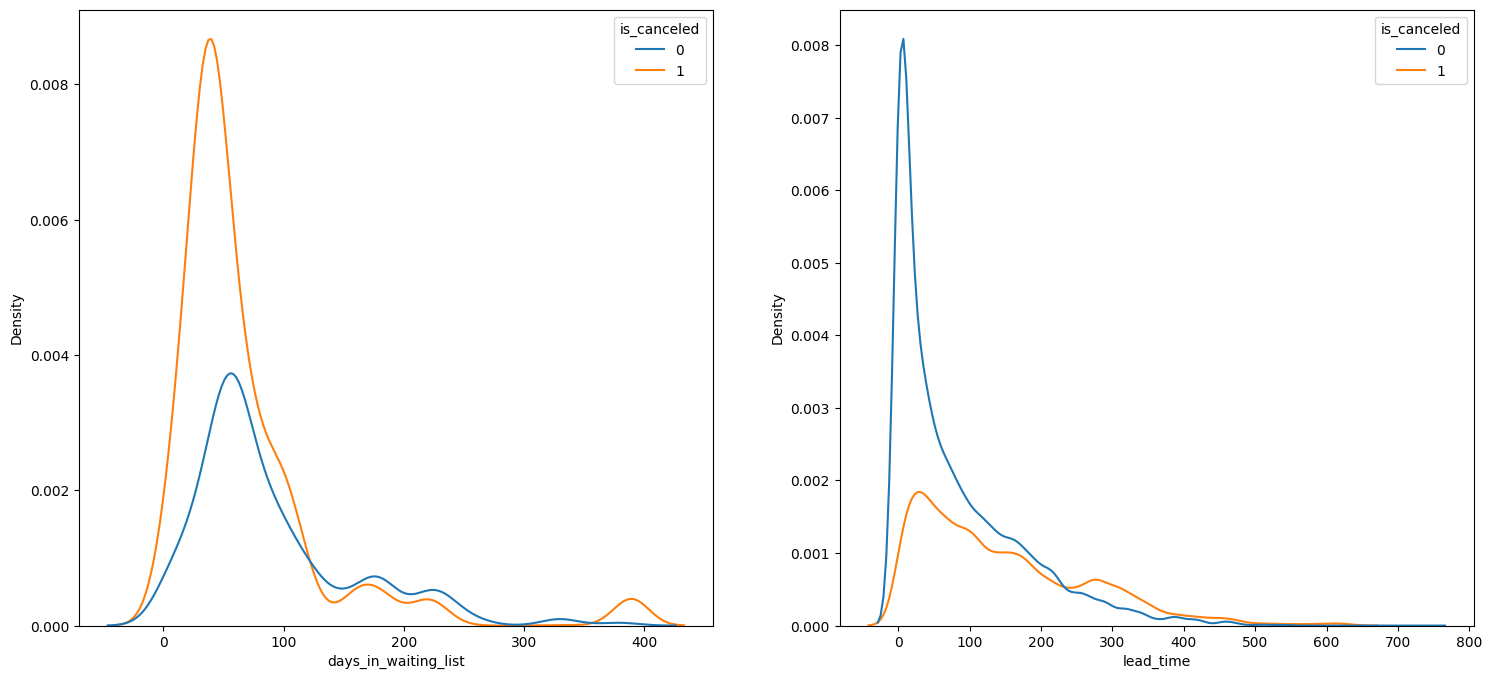

In [130]:
# Selecting bookings with non zero waiting time
waiting_bookings = hotel_df[hotel_df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = hotel_df['lead_time'], hue = hotel_df['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 50 days but also most of bookings that are not cancelled also have waiting period less than 50 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has a smaller affect on cancellation of bookings when lead_time is greater than 50. At 250 the cancellation is higher. On average,both curves of cancelation and not cancelation are similar for lead time too.

3. Whether not getting allotted the same room type as demand is the main cause of cancellation for bookings?

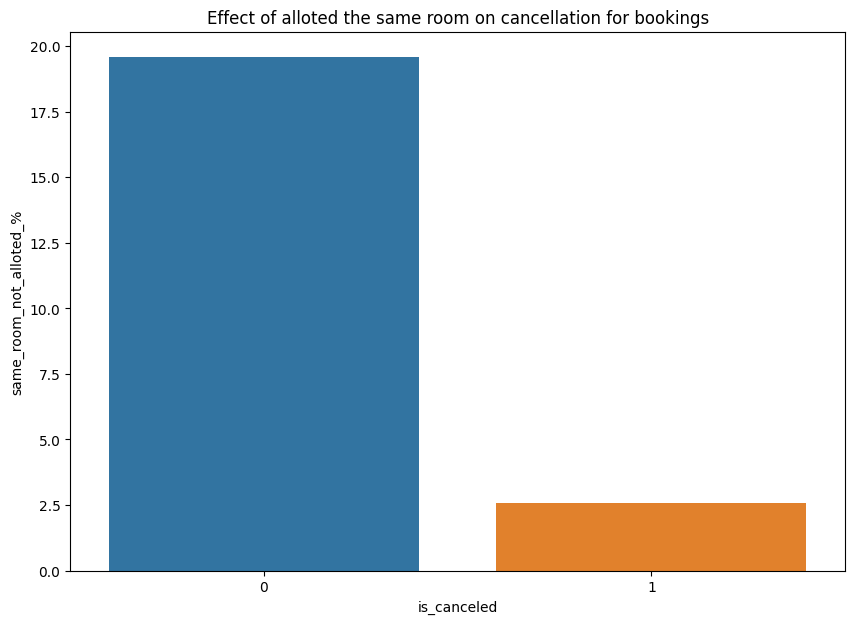

In [150]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

hotel_df1['same_room_not_alloted'] = hotel_df1.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = hotel_df1.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.title('Effect of alloted the same room on cancellation for bookings')
plt.show()

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

4. Does not alloting the same room as demanded affect adr?

Lets see does not getting same room affects the adr.

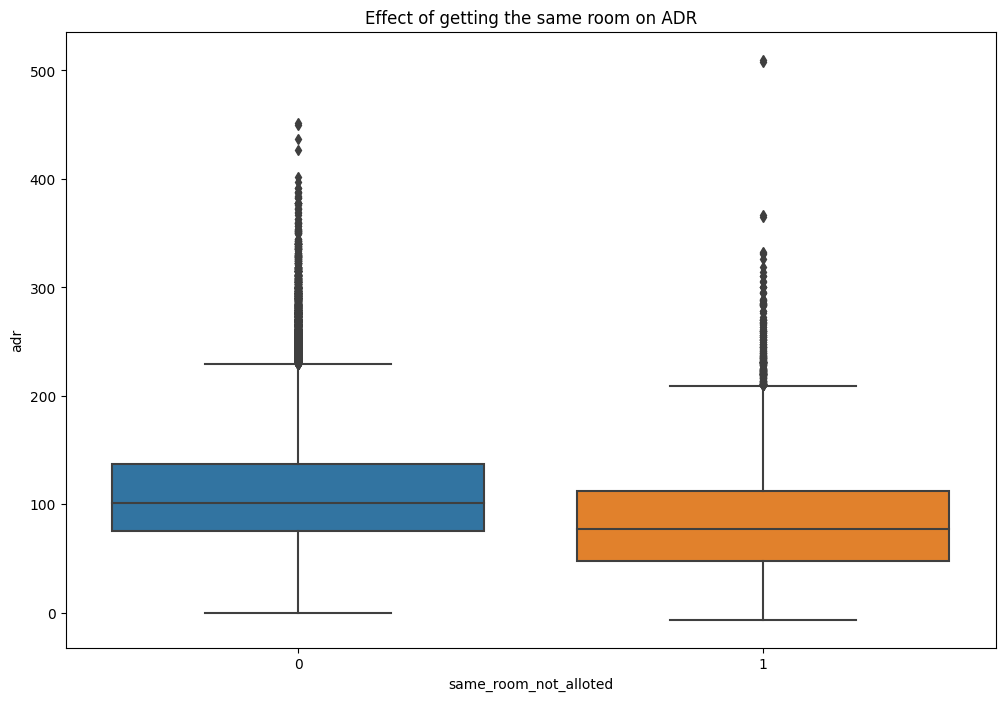

In [151]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = hotel_df1)
plt.title('Effect of getting the same room on ADR')
plt.show()

So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

5. Which deposit_type have a majotity of bookings?

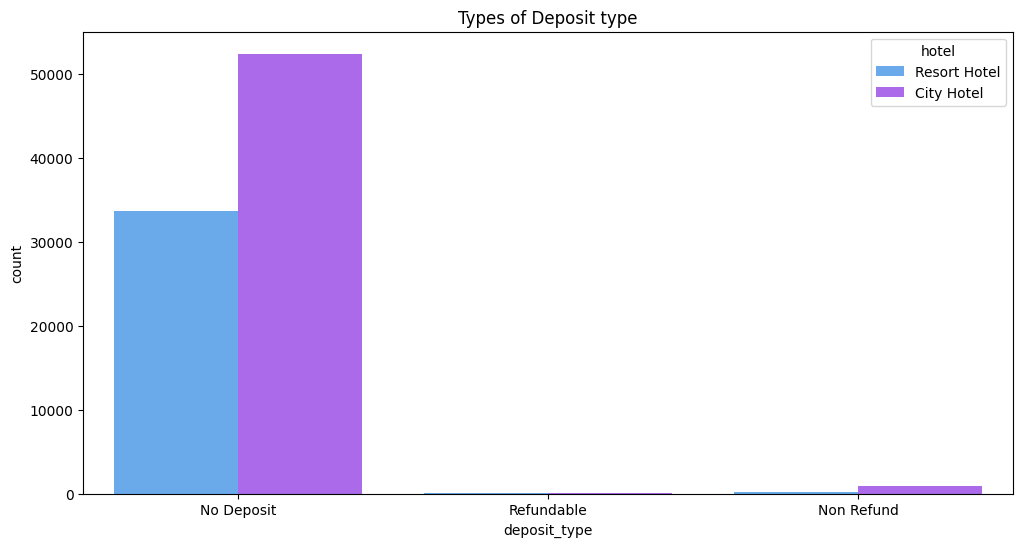

In [133]:
# barplot to see which deposity_type have a majority of bookings. 
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel_df1, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type')

plt.show()

Majority of the bookings don't have a deposit towards it.

# (4) Time wise analysis

1. Which are the most busiest months?

In [134]:
hotel_df1.arrival_date_month.value_counts(normalize=True) 

August       0.128879
July         0.115134
May          0.095656
April        0.090566
June         0.088915
March        0.085843
October      0.079343
September    0.076603
February     0.069736
December     0.058604
November     0.057011
January      0.053709
Name: arrival_date_month, dtype: float64

Value_counts counts the number of times each values has appeared for example, July appeared in the arrival_date_month column 11.51% times

August is the most occupied month with 12.89% bookings and January is the least occupied month with 5.37% bookings.

Text(0.5, 1.0, 'Number of guests for each Hotel in each month for a year')

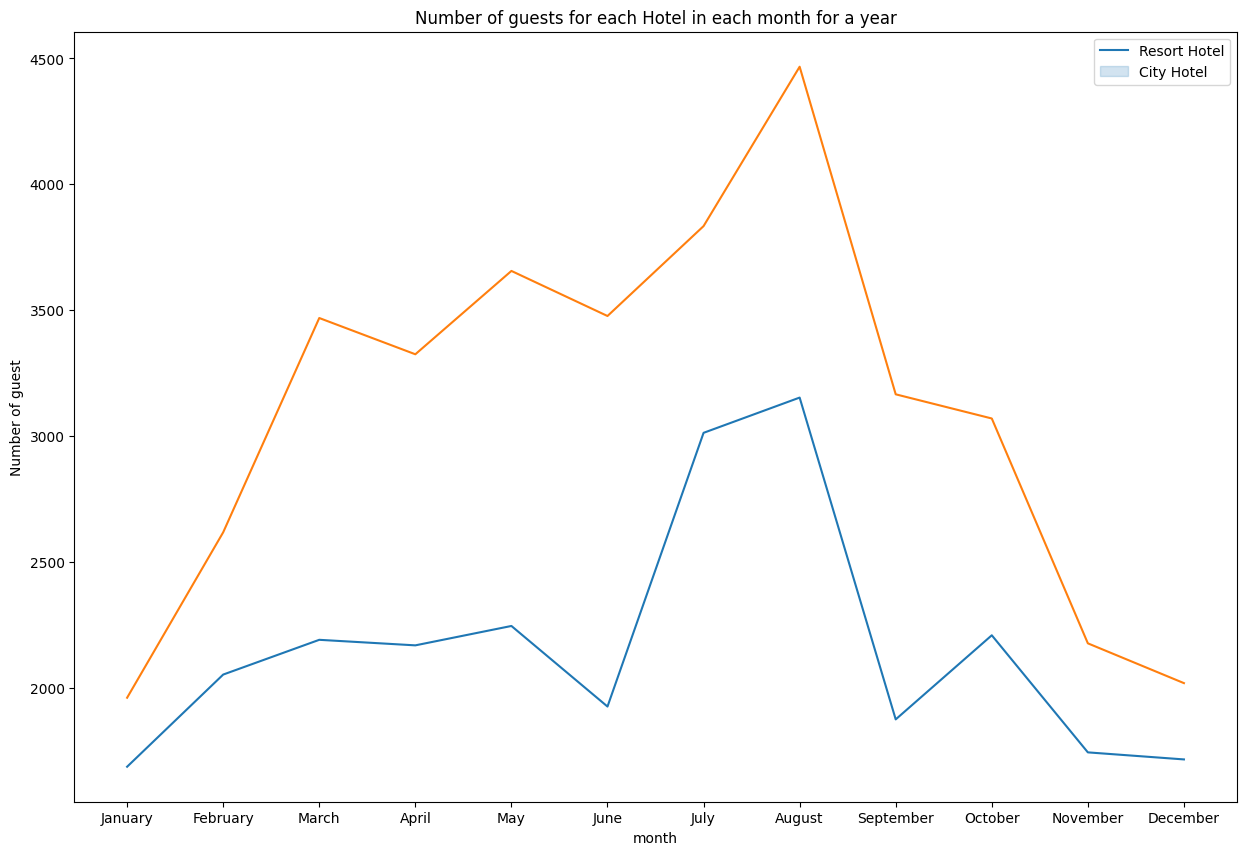

In [135]:
# Which are the most busy months?
d_month = hotel_df1['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = hotel_df1[(hotel_df1['hotel'] == 'Resort Hotel') & (hotel_df1['is_canceled'] == 0)]
data_city = hotel_df1[(hotel_df1['hotel'] == 'City Hotel') & (hotel_df1['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort Hotel','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Number of guests for each Hotel in each month for a year')

Most number of guest comes in month of August and the least number of guests comes in the month of January.

Most number of guest comes in month of August.

2. Which month results in high revenue?

In which months hotels charges higher adr? 

In [136]:
data_resort = hotel_df1[(hotel_df1['hotel'] == 'Resort Hotel') & (hotel_df1['is_canceled'] == 0)]
data_city = hotel_df1[(hotel_df1['hotel'] == 'City Hotel') & (hotel_df1['is_canceled'] == 0)]

Text(0.5, 1.0, 'Total revenue (adr) per month')

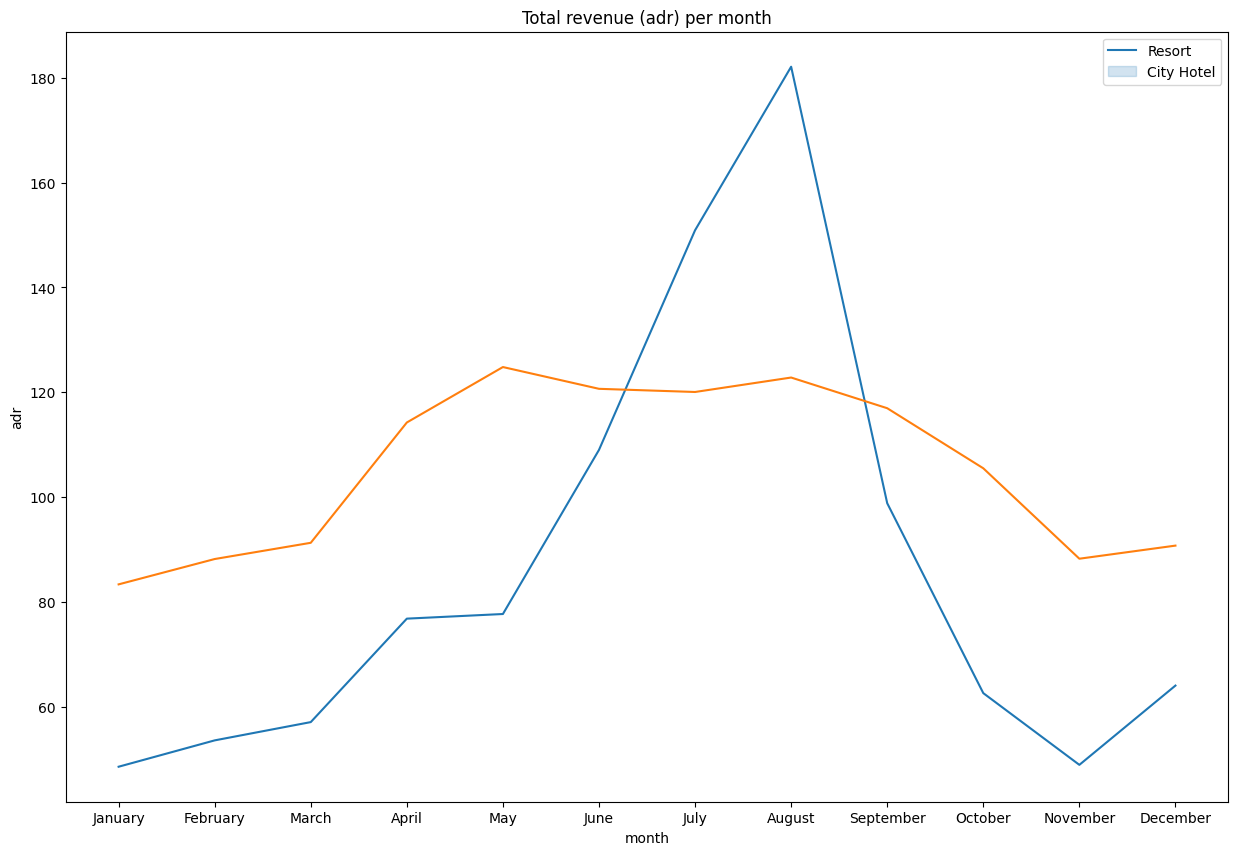

In [137]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Total revenue (adr) per month')

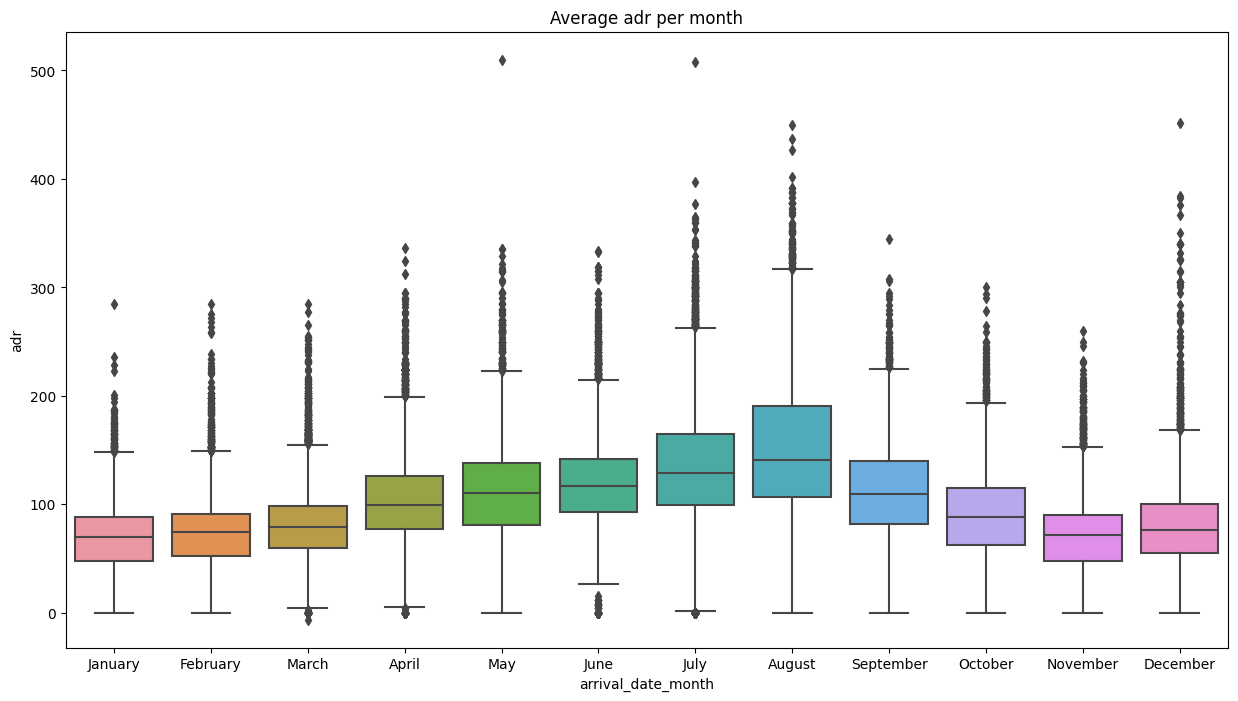

In [138]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
hotel_df1['arrival_date_month'] = pd.Categorical(hotel_df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = hotel_df1['arrival_date_month'],y = hotel_df1['adr'])
plt.title('Average adr per month')
plt.show()

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.

For both City and Resort hotels, Nov to Jan have cheaper average daily rates.

3. What is the trend of bookings within a month?

How does booking numbers and adr changes within a month?

Now let us check the trend of arrival_num and avg adr within a month.

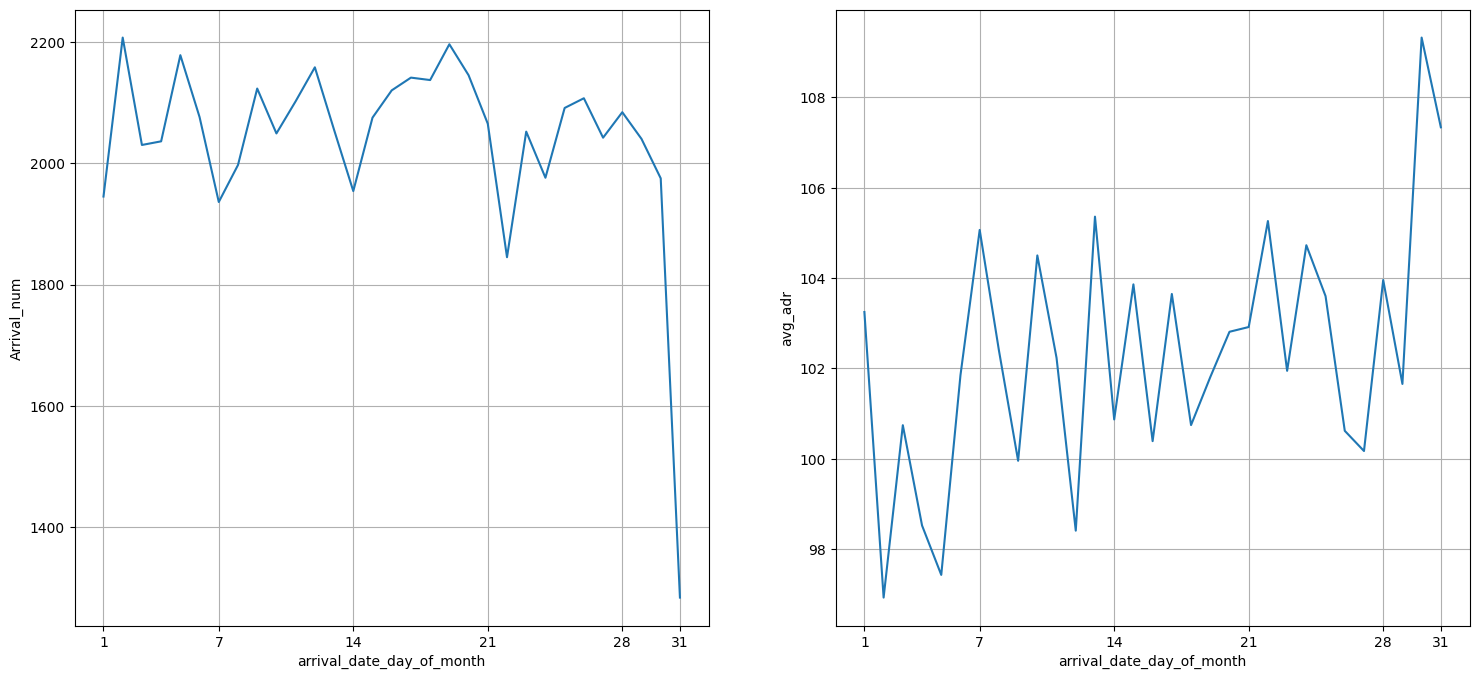

In [139]:
d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g = sns.lineplot(ax = axes[0],x = d6.index, y = d6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h = sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()


We can see that graph Arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend.

Also the avg adr tends to go up as month ends. Therefore charge more at the end of month.

4. Which types of customers mostly make bookings?

Let us divide our customers in three categories of single, couple and family/friends. then check their booking %

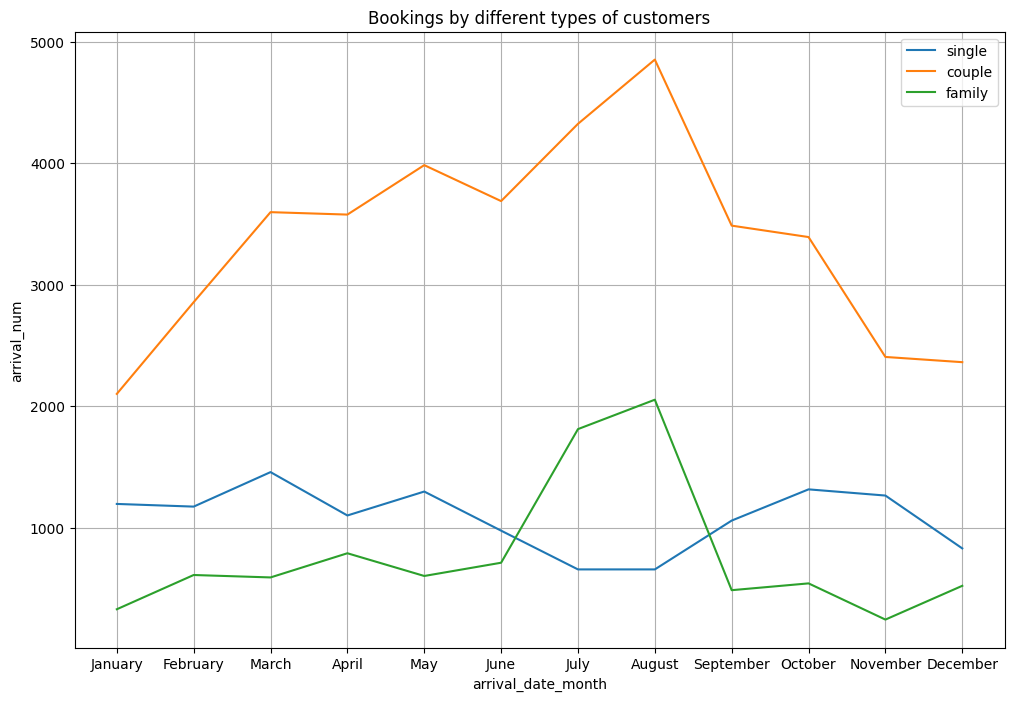

In [140]:
# Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.title('Bookings by different types of customers')
plt.show()

Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that).

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

# Some important questions

Some other analysis are also done, which are as follows:
    
1. What are the different reason for special requests?
2. What is the optimal stay length for better deal for customers?
3. How adr is affected by total staying period in hotels?

1. What are the different reason for special requests?

What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

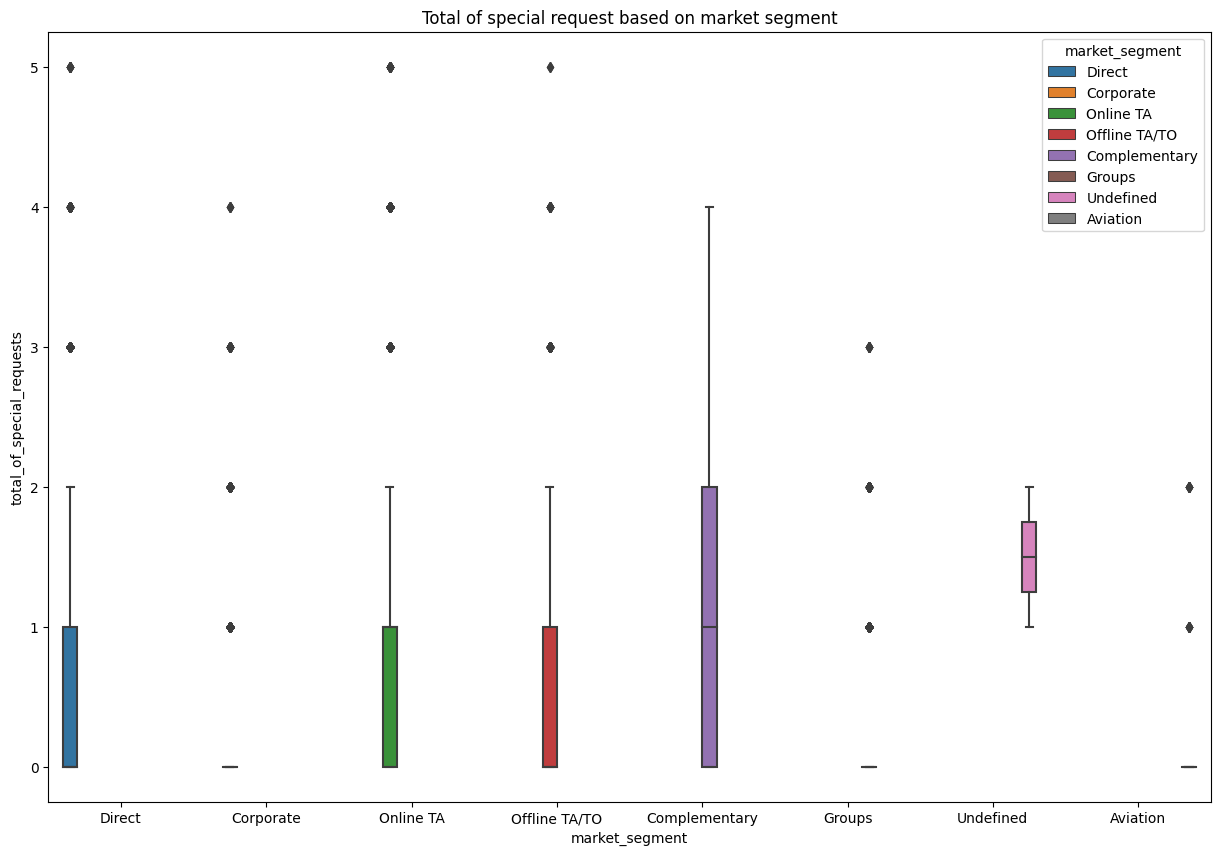

In [152]:
# Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= hotel_df1)

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Total of special request based on market segment')
plt.show()

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

Here we can see that all market segment mostly have special request.

There is one segment which is complementary, having more than average number of special request.


Text(0.5, 1.0, 'Total of special requests according to number of Kids')

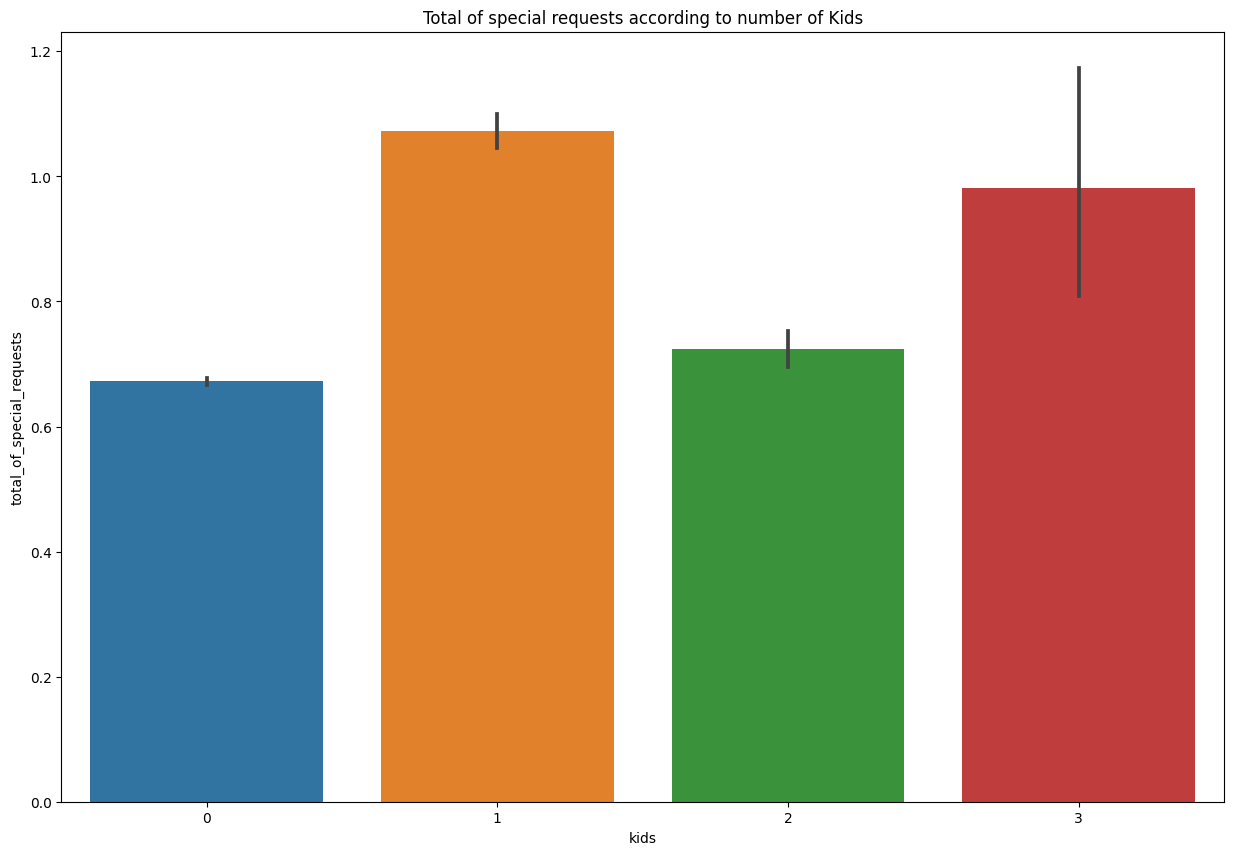

In [164]:
#Special request according to number of kid.

hotel_df1['kids'] = hotel_df1['children'] + hotel_df1['babies']
sns.barplot(x="kids", y="total_of_special_requests",data= hotel_df1)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Total of special requests according to number of Kids')

The number of special request are almost the same in the kids section. 


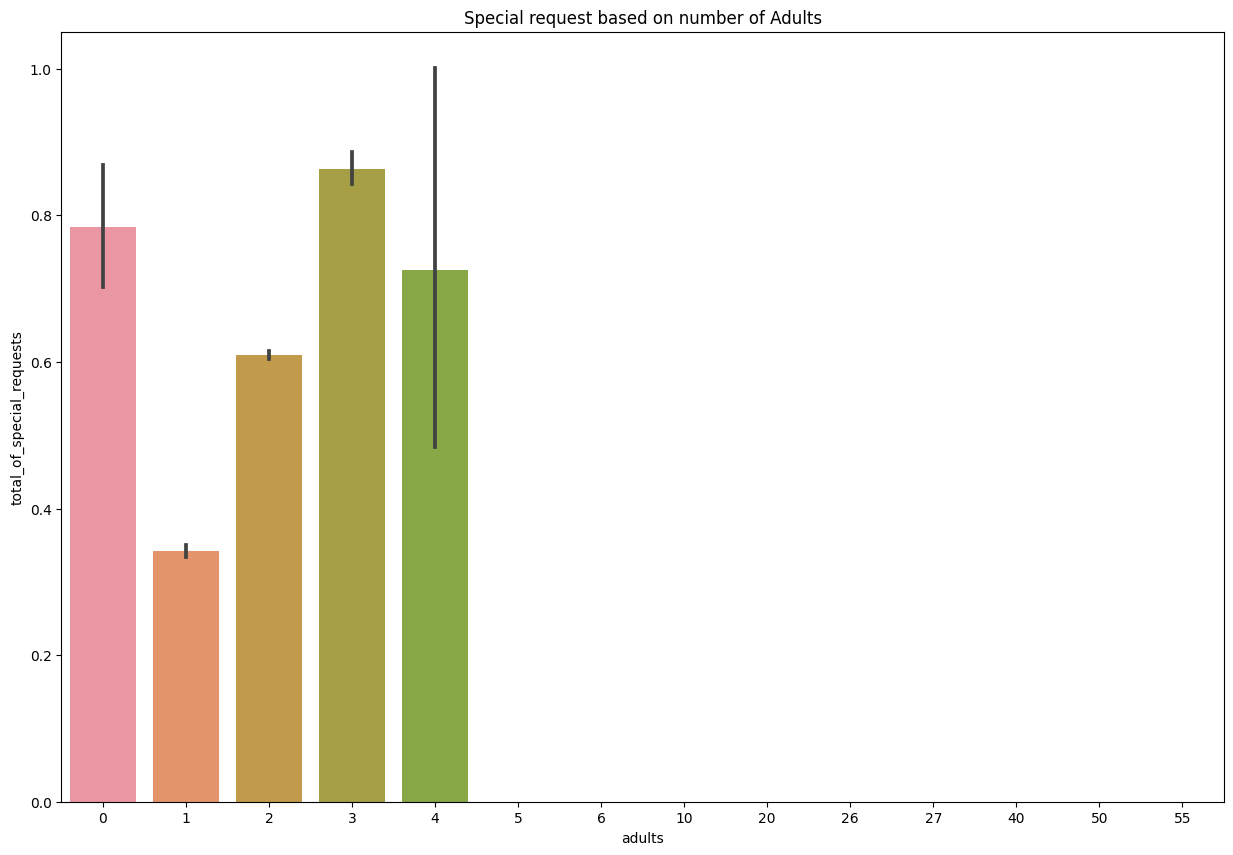

In [165]:
#Special request according to number of adults.
sns.barplot(x="adults", y="total_of_special_requests",data= hotel_df)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Special request based on number of Adults')
plt.show()

We can see that if the adults are more than two there are more chances that hotels will receive more special requests.

2. What is the optimal stay length for better deal for customers?

In [160]:
hotel_df1.drop(hotel_df1[hotel_df1['adr'] > 5000].index, inplace = True)

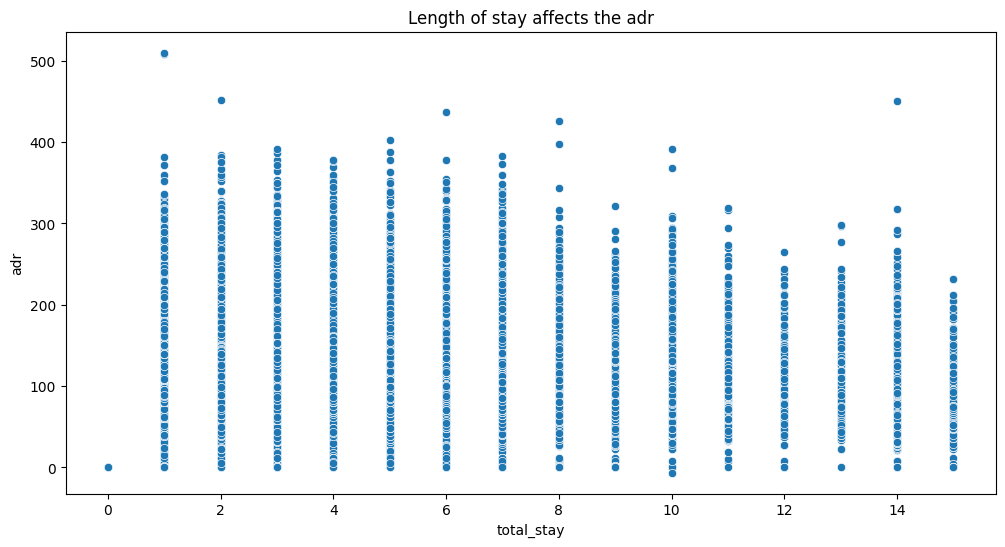

In [161]:
# The optimal stay length for better deal for customers.
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df1)
plt.title('Length of stay affects the adr')
plt.show()

For shorter stays the adr(average daily rate varies greatly) but for longer stays (> 15 days) adr is comparatively very less. Therefore, customers can get better deal for longer stays more than 15 days.

3. How adr is affected by total staying period in hotels?

In [1]:
num_df1 = hotel_df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests', 'total_stay', 'total_people']]

NameError: name 'hotel_df1' is not defined

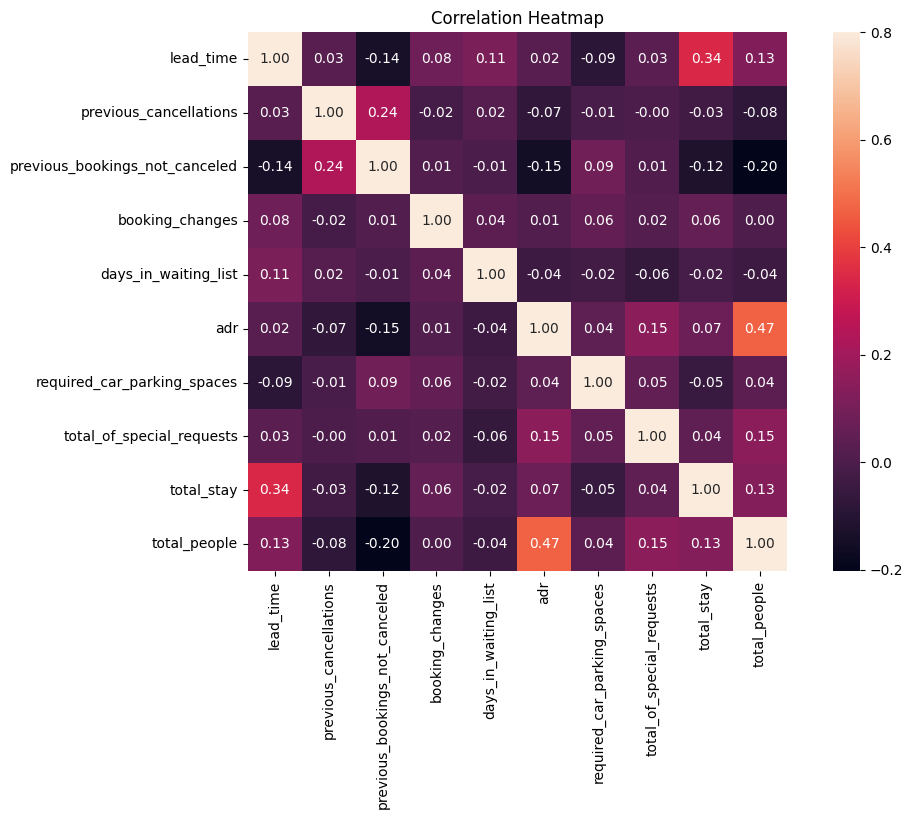

In [168]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
plt.title('Correlation Heatmap')
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1. Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2. adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

# Most used words from listing countries

In [ ]:
# Combine all hotel reviews into one big text

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = hotel_df1['country'][1]
text = " ".join(i for i in hotel_df1['country'])
len(text)

In [ ]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(['Great Britain', 'France', 'Portugal', 'Spain', 'Italy', 'Germany'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=2048,height=1024, max_words=1000).generate(text)

In [ ]:
# Display the generated image
plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

# Reference

MOSTIPAK, J. 2023. Hotel booking demand. Available at: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand 

SLAKKOJU79. 2023. EDA on Hotel Bookings Data. Available at: https://jovian.com/slakkoju79/eda-on-hotel-bookings-dataset#C13